In [1]:
# Impact of a Professional Athlete on a Local Economy

# Research Questions: 
## What was the economic impact of the city of cleveland during the following years:
##  2003-2010 (Lebron in Cleveland, Finals in 2007)
##  2010-2014 (Lebron in Miami)
##  2014-2018 (Lebron back home with four trips to Championships, Championship 2016)

# Impact of Lebron playing in Cleveland on Restaurants, Retail Sales, Hotels, and Game Attendance.
# Target a state down to a zip code, break down data

# Bonus: How do events such as the Cleveland Indians, Browns, and Concerts affect data?


In [6]:
from config import census_api_key
from config import bls_api_key
from config import bea_api_key

import requests
import json
import prettytable
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [7]:
### Example for using API Census to pull data. It takes several parameters in. The first is the year, followed by a slew of variables.
### In this example we take the geographical location (from a zip code put in at the end of the URL)
### The number of people employed at that location, and the total payroll in that zipcode.
### Sales tax receipts 

url = f"https://api.census.gov/data/2007/zbp?get=GEO_TTL,EMP,NAICS_TTL,PAYANN&for=zipcode:44113&key={census_api_key}"

response = requests.get(url)
print(response.url)

https://api.census.gov/data/2007/zbp?get=GEO_TTL,EMP,NAICS_TTL,PAYANN&for=zipcode:44113&key=d38a2e9fb4b46b223a18e575c7275bbcbfad9482


In [8]:
data = response.json()
print(json.dumps(data, indent=4, sort_keys=True))

[
    [
        "GEO_TTL",
        "EMP",
        "NAICS_TTL",
        "PAYANN",
        "zipcode"
    ],
    [
        "Cleveland, OH",
        "23408",
        "Total",
        "1150388",
        "44113"
    ]
]


In [14]:
results = []

for year in range(2004, 2017):
    year = year
    for zipcode in range(44113, 44116):
        url = f"https://api.census.gov/data/{year}/zbp?get=EMP,ESTAB&for=zipcode:{zipcode}&key={census_api_key}"
        response = requests.get(url).json()
        if 'error' not in response:
            results.append([year, response[1][0], response[1][1], response[1][2]])

In [16]:
dataset = pd.DataFrame(results)

In [17]:
dataset.columns=["Year", "EMP", "ESTAB", "Zipcode"]
dataset

,Year,EMP,ESTAB,Zipcode
0,2004,22349,1460,44113
1,2004,45458,1662,44114
2,2004,35322,1029,44115
3,2005,23071,1462,44113
4,2005,54679,1617,44114
5,2005,38191,990,44115
6,2006,23551,1435,44113
7,2006,43168,1589,44114
8,2006,38821,950,44115
9,2007,23408,1393,44113


In [18]:
# pd.to_numeric(dataset['EMP'], errors='coerce')
# dataset['EMP'].dtypes
# print (dataset['EMP'].dtypes)

dataset['EMP'] = dataset['EMP'].astype(int)

emp_stats = dataset.groupby('Year').agg(
    emp_mean = ('EMP', np.mean)
)

In [19]:
emp_stats.round(2)

,emp_mean
Year,
2004,34376.33
2005,38647.00
2006,35180.00
2007,34444.00
2008,32100.67
2009,29906.67
2010,29572.00
2011,30394.00
2012,28735.67


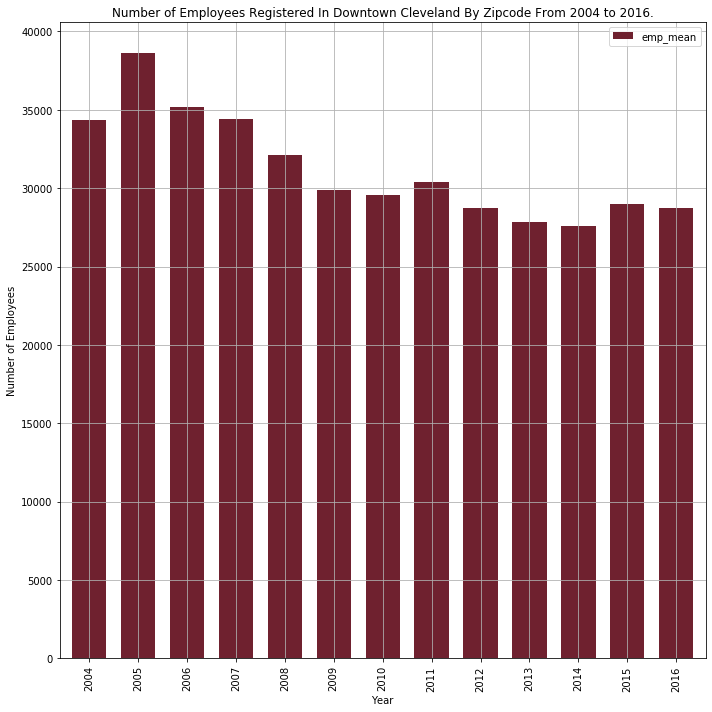

In [26]:
EMP_graph = emp_stats.plot(kind='bar', title="Number of Employees Registered In Downtown Cleveland By Zipcode From 2004 to 2016.", color="#6f212f", figsize=(10, 10), grid=True, width=.7)
EMP_graph.set_xlabel("Year")
EMP_graph.set_ylabel("Number of Employees")
plt.tight_layout()